<a href="https://colab.research.google.com/github/rahuljungbahadur/hands_on_ml_book/blob/main/Exercises-chp11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercises from the chapter Training Deep Neural Networks (chp11)

Unserstanding about the diff activation functions, their pros/cons. Dropout/BatchNormalization. Regularization etc. MCMC estimates.

8. Practice training a deep neural network on the CIFAR10 image dataset:



1. Build a DNN with 20 hidden layers of 100 neurons each (that’s too many, but it’s the point of this exercise). Use He initialization and the ELU activation function.

In [1]:
from tensorflow.keras.datasets import cifar10

In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
X_train[0].shape

(32, 32, 3)

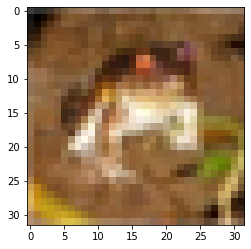

In [5]:
plt.imshow(X_train[0])

In [6]:
y_train[0]

array([6], dtype=uint8)

In [7]:
help(cifar10.load_data)

Help on function load_data in module keras.datasets.cifar10:

load_data()
    Loads the CIFAR10 dataset.
    
    This is a dataset of 50,000 32x32 color training images and 10,000 test
    images, labeled over 10 categories. See more info at the
    [CIFAR homepage](https://www.cs.toronto.edu/~kriz/cifar.html).
    
    The classes are:
    
    | Label | Description |
    |:-----:|-------------|
    |   0   | airplane    |
    |   1   | automobile  |
    |   2   | bird        |
    |   3   | cat         |
    |   4   | deer        |
    |   5   | dog         |
    |   6   | frog        |
    |   7   | horse       |
    |   8   | ship        |
    |   9   | truck       |
    
    Returns:
      Tuple of NumPy arrays: `(x_train, y_train), (x_test, y_test)`.
    
    **x_train**: uint8 NumPy array of grayscale image data with shapes
      `(50000, 32, 32, 3)`, containing the training data. Pixel values range
      from 0 to 255.
    
    **y_train**: uint8 NumPy array of labels (integer

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.activations import elu, softmax
from tensorflow.keras.initializers import he_normal

## Building model1

In [9]:
## model with 20 hidden layers having 100 neurons each
model1 = Sequential()

model1.add(Flatten(input_shape=[32,32,3]))

for i in range(20):
  model1.add(Dense(units=100, activation=elu, kernel_initializer=he_normal))


model1.add(Dense(10, activation=softmax))


In [10]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 100)               307300    
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dense_2 (Dense)             (None, 100)               10100     
                                                                 
 dense_3 (Dense)             (None, 100)               10100     
                                                                 
 dense_4 (Dense)             (None, 100)               10100     
                                                                 
 dense_5 (Dense)             (None, 100)               1

In [11]:
earlyStop = EarlyStopping(patience=0)

In [12]:
from tensorflow.python.keras import callbacks
## Training using NADAM optimizer and EarlyStopping

model1.compile(optimizer='nadam', loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
## Converting y to categorical
from tensorflow.keras.utils import to_categorical

In [14]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [15]:
X_train = X_train/255
X_test = X_test/255

In [16]:
## Fitting the model
model1.fit(x=X_train, y=y_train, callbacks=[earlyStop], validation_data=(X_test, y_test), epochs=10)

Epoch 1/10
1563/1563 [==============================] - 37s 18ms/step - loss: 2.0428 - accuracy: 0.2512 - val_loss: 1.8847 - val_accuracy: 0.3135
Epoch 2/10
1563/1563 [==============================] - 25s 16ms/step - loss: 1.8365 - accuracy: 0.3302 - val_loss: 1.9093 - val_accuracy: 0.3066


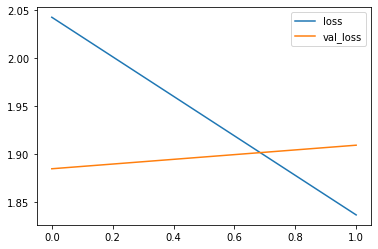

In [19]:
pd.DataFrame(model1.history.history)[['loss', 'val_loss']].plot(kind='line')

## Building model2 using BatchNormalizaion

In [17]:
from tensorflow.keras.layers import BatchNormalization

In [21]:
model2 = Sequential()

model2.add(Flatten(input_shape=[32,32,3]))

for i in range(20):

  model2.add(BatchNormalization())
  model2.add(Dense(units=100, activation=elu, kernel_initializer=he_normal, use_bias=False))

model2.add(Dense(units=10, activation=softmax))

In [22]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 3072)              0         
                                                                 
 batch_normalization_20 (Bat  (None, 3072)             12288     
 chNormalization)                                                
                                                                 
 dense_42 (Dense)            (None, 100)               307200    
                                                                 
 batch_normalization_21 (Bat  (None, 100)              400       
 chNormalization)                                                
                                                                 
 dense_43 (Dense)            (None, 100)               10000     
                                                                 
 batch_normalization_22 (Bat  (None, 100)             

In [23]:
model2.compile(optimizer='nadam', loss='categorical_crossentropy', metrics=['accuracy'])

In [24]:
model2.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), epochs=10, callbacks=[earlyStop])

Epoch 1/10
1563/1563 [==============================] - 111s 61ms/step - loss: 1.9178 - accuracy: 0.3150 - val_loss: 1.6794 - val_accuracy: 0.3995
Epoch 2/10
1563/1563 [==============================] - 91s 58ms/step - loss: 1.7109 - accuracy: 0.3919 - val_loss: 1.6303 - val_accuracy: 0.4271


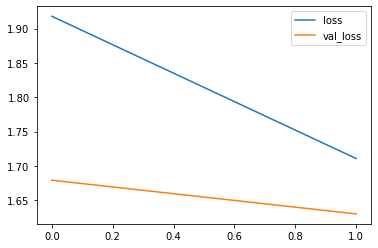

In [25]:
pd.DataFrame(model2.history.history)[['loss', 'val_loss']].plot(kind='line')